Copyright Matlantis Corp. as contributors to Matlantis contrib project

In [1]:
import pickle
import pandas as pd
import numpy as np
import lightgbm as lgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

## 8. View results

In [2]:
with open("models/valid_data.pkl", "rb") as f:
    res_data = pickle.load(f)

In [3]:
model_list = [x[0] for x in res_data]
x_list = [x[1] for x in res_data]
y_list = [x[2] for x in res_data]

In [4]:
y_pred_list = [model_list[i].predict(x_list[i]) for i in range(5)]

/usr/local/pyenv/versions/python311/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/pyenv/versions/python311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


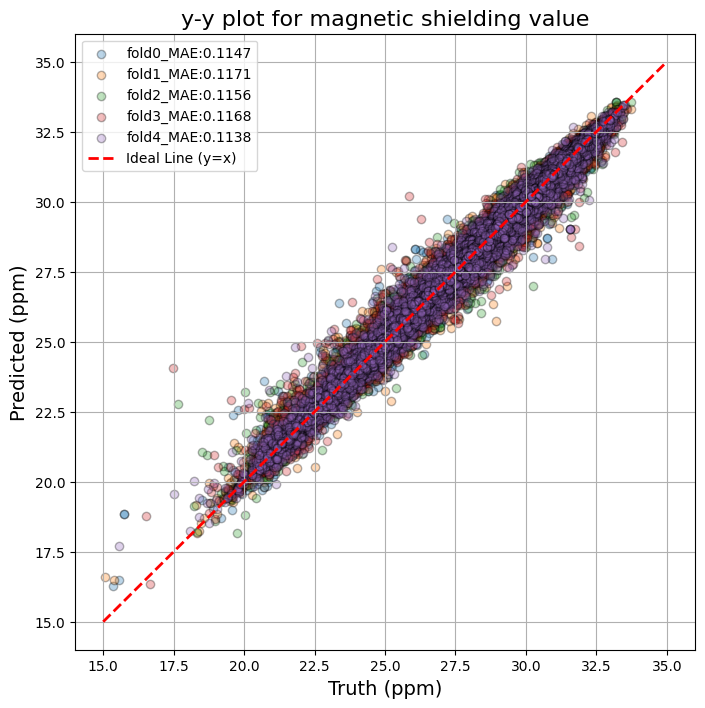

In [11]:
plt.figure(figsize=(8, 8))
for i, (y_true, y_pred) in enumerate(zip(y_list, y_pred_list)):
    mae = mean_absolute_error(y_true, y_pred)
    plt.scatter(y_true, y_pred, alpha=0.2, edgecolors='k', label=f'fold{i}_MAE:{mae:.4f}')

plt.plot([15, 35], [15, 35], 'r--', lw=2, label='Ideal Line (y=x)')

plt.xlabel('Truth (ppm)', fontsize=14)
plt.ylabel('Predicted (ppm)', fontsize=14)
plt.title("y-y plot for magnetic shielding value", fontsize=16)
plt.grid(True)
plt.legend()